In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6967 - val_loss: 0.6965
Epoch 2/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6964 - val_loss: 0.6963
Epoch 3/5
235/235 [==============================] - 3s 14ms/step - loss: 0.6961 - val_loss: 0.6960
Epoch 4/5
235/235 [==============================] - 3s 14ms/step - loss: 0.6959 - val_loss: 0.6958
Epoch 5/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6956 - val_loss: 0.6955


**1 AutoEncoder**

4422102/4422102 [==============================] - 1s 0us/step
Epoch 1/5
235/235 [==============================] - 9s 8ms/step - loss: 0.6937 - accuracy: 0.0016 - val_loss: 0.6936 - val_accuracy: 0.0017
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 0.0015 - val_loss: 0.6935 - val_accuracy: 0.0017
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 0.0016 - val_loss: 0.6935 - val_accuracy: 0.0016
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6934 - accuracy: 0.0015 - val_loss: 0.6934 - val_accuracy: 0.0016
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


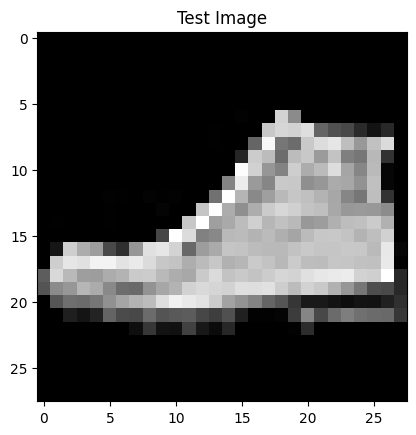

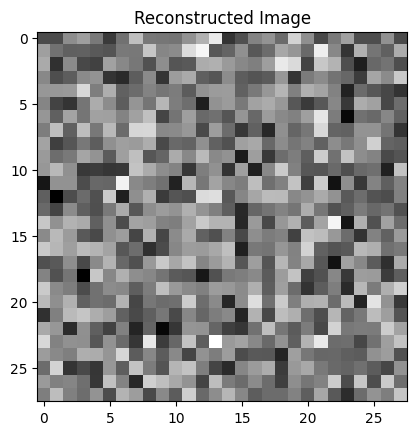

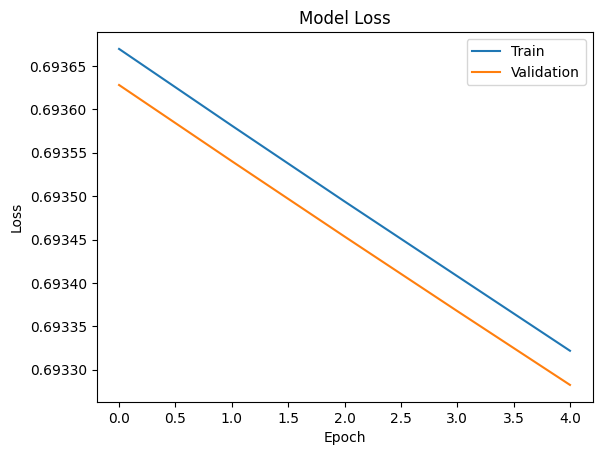

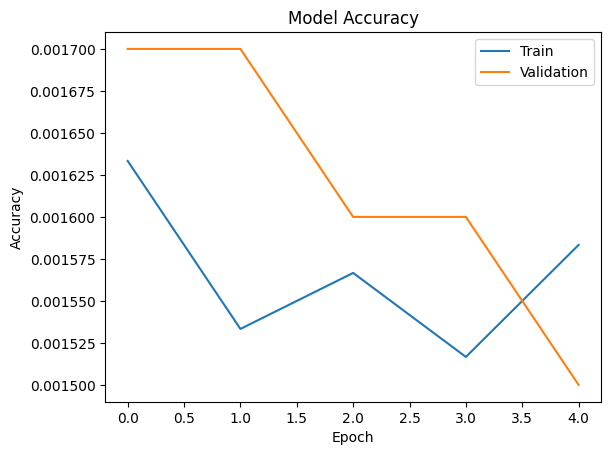

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(encoded)# new hiden_layer for encoded
# "decoded" is the lossy reconstruction of the input 
decoded = Dense(256, activation='relu')(encoded)# new hiden_layer for decoded
decoded = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy' , metrics=['accuracy'])

from keras.datasets import fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# make a prediction on the test data
decoded_imgs = autoencoder.predict(x_test)

# visualize a sample of the reconstructed images
import matplotlib.pyplot as plt

# choose a random image from the test set
idx = np.random.randint(x_test.shape[0])
# display the noisy image
plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
plt.title('Test Image')
plt.show()
# display the reconstructed image
plt.imshow(decoded_imgs[idx].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.show()


# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Here in the autoencoder i have added one hidden layer and then predicted the x_test and random ly picked one image and ploted before reconstruction and after reconstruction also added loss and accuracy


**2. Denoisening autoencoder**

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.6980 - accuracy: 0.0014 - val_loss: 0.6979 - val_accuracy: 0.0014
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6976 - accuracy: 0.0014 - val_loss: 0.6976 - val_accuracy: 0.0016
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6973 - accuracy: 0.0015 - val_loss: 0.6973 - val_accuracy: 0.0016
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6970 - accuracy: 0.0014 - val_loss: 0.6969 - val_accuracy: 0.0016
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6967 - accuracy: 0.0015 - val_loss: 0.6967 - val_accuracy: 0.0016
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6964 - accuracy: 0.0015 - val_loss: 0.6964 - val_accuracy: 0.0016
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.6961 - accuracy: 0.0015 - val_loss: 0.6961 - val_accuracy: 0.0017
Epoch 

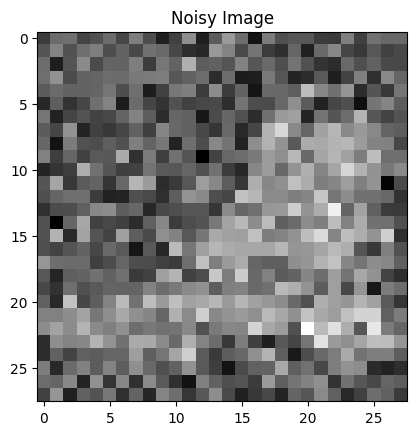

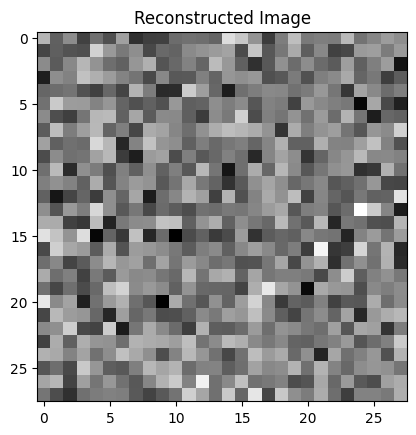

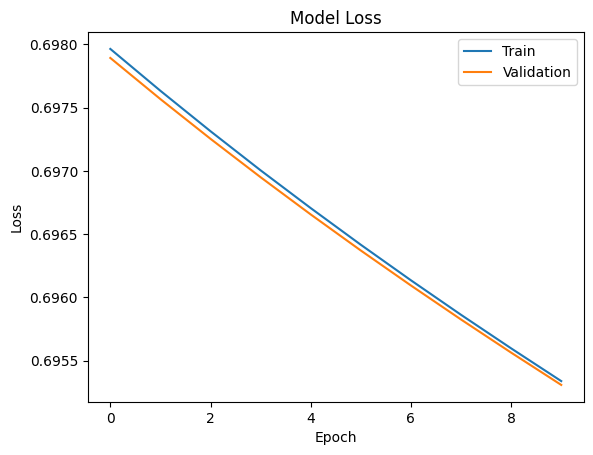

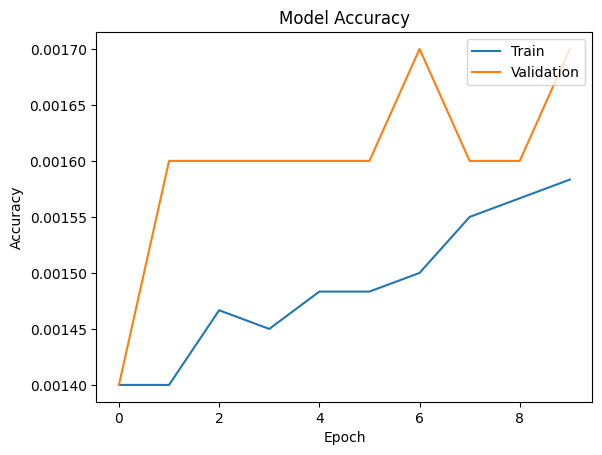

In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy' , metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


# make a prediction on the test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# visualize a sample of the reconstructed images
import matplotlib.pyplot as plt

# choose a random image from the test set
idx = np.random.randint(x_test.shape[0])
# display the noisy image
plt.imshow(x_test_noisy[idx].reshape(28, 28), cmap='gray')
plt.title('Noisy Image')
plt.show()
# display the reconstructed image
plt.imshow(decoded_imgs[idx].reshape(28, 28), cmap='gray')
plt.title('Reconstructed Image')
plt.show()


# plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()



Here in the denoisening autoencoder i have predicted the x_test and randomly picked one image and ploted before reconstruction and after reconstruction also added loss and accuracy